Etude de la matrice de rotation du skate:
https://thepoorengineer.com/en/quaternion/

In [53]:
import os
import sys

print(sys.path)
if '\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\' not in sys.path:
    sys.path.append('\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\')
    print("ok")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

import movuinos.SkateboardXXX3000DataSet as sk
import tools.display_functions as df
import tools.signal_analysis as sa
import tools.integratino_functions as ifct
import tools.correction_interpolation as ci

import models.detection.detection_energy as dt
import models.classification.reference_tricks_classification as rtc

from pathlib import Path

from tools.quaternion import Quaternion#, get_euler_angles, get_rot_mat

['c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\study', 'C:\\Users\\Pierre\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'C:\\Users\\Pierre\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'C:\\Users\\Pierre\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'C:\\Users\\Pierre\\AppData\\Local\\Programs\\Python\\Python310', 'c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\venv', '', 'c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\venv\\lib\\site-packages', 'c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\venv\\lib\\site-packages\\win32', 'c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\venv\\lib\\site-packages\\win32\\lib', 'c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\venv\\lib\\site-packages\\Pythonwin', '\\Users\\Pierre\\

In [54]:
tricks_path = "../../../06_Data/Isolated_Tricks/fs_shovit/fs_shovit_success_2.csv"

print(Path(tricks_path).exists())
print(Path(tricks_path).glob(pattern="*"))
#--- Opening file ---
print("Opening : " + tricks_path)
trick = sk.SkateboardXXX3000DataSet(tricks_path)

True
<generator object Path.glob at 0x00000195A023F1B0>
Opening : ../../../06_Data/Isolated_Tricks/fs_shovit/fs_shovit_success_2.csv
Reading : ../../../06_Data/Isolated_Tricks/fs_shovit/fs_shovit_success_2.csv


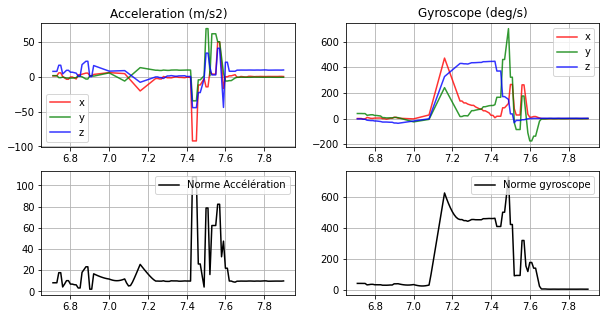

In [55]:
plt.figure(figsize=(10,5))
trick.dispRawData()

[-0.5729578   0.          2.29183118]
[0.2693896  0.29345232 0.08704458 0.95322721]
[[-0.75753386 -0.46249212  0.60635127]
 [ 0.56466585 -0.91460887  0.00784052]
 [ 0.51255566  0.32405252  0.88752185]]
[[-0.75753386 -0.46249212  0.60635127]
 [ 0.56466585 -0.91460887  0.00784052]
 [ 0.51255566  0.32405252  0.88752185]]
(120, 3)
(120,)


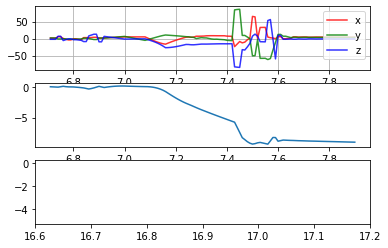

(120, 3, 3)


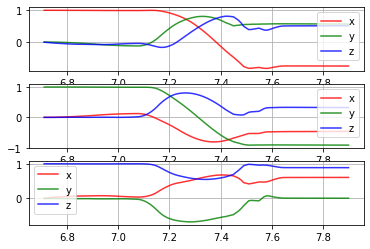

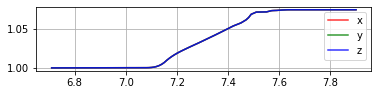

In [56]:
quaternion=Quaternion()
print(trick.gyroscope[:,100])
a_fixes=[]
N=[]
q=[]
for i in range(trick.nb_row):
    quaternion.rotate(trick.gyroscope[:,i]*np.pi/180,trick.Te)
    # print(np.linalg.norm(q))
    rot =quaternion.get_rot_mat()
    q.append(rot.T)
    n=np.linalg.norm(rot,axis=1)
    # rot[0,:]=rot[0,:]/n[0]
    # rot[1,:]=rot[1,:]/n[1]
    # rot[2,:]=rot[2,:]/n[2]
    N.append(n)
    a_fixe=np.matmul(rot.T, trick.acceleration[:,i])
    a_fixe[2]-=10
    a_fixes.append(a_fixe)

print(quaternion.q)
print(quaternion.get_rot_mat())

print(rot)
a_fixes=np.array(a_fixes)
# a_fixes=trick.acceleration
vz_fixes=ifct.EulerIntegration(a_fixes[:,2],trick.Te)
posz_fixes=ifct.EulerIntegration(vz_fixes,trick.Te)

print(a_fixes.shape)
print(vz_fixes.shape)



df.plotVector(trick.time,a_fixes,"",311)
plt.subplot(312)
plt.plot(trick.time,vz_fixes[:])
plt.subplot(313)
plt.plot(trick.time,posz_fixes[:])
plt.xlim([16.6,17.2])
# plt.ylim(ymin=0)
plt.show()

N=np.array(N)
q=np.array(q)
print(q.shape)
df.plotVector(trick.time, q[:,0],"",311)
df.plotVector(trick.time, q[:,1],"",312)
df.plotVector(trick.time, q[:,2],"",313)
plt.show()

df.plotVector(trick.time,N,"",311)
plt.show()

[-0.5729578   0.          2.29183118]
[0.2693896  0.29345232 0.08704458 0.95322721]
[[-0.75753386 -0.46249212  0.60635127]
 [ 0.56466585 -0.91460887  0.00784052]
 [ 0.51255566  0.32405252  0.88752185]]


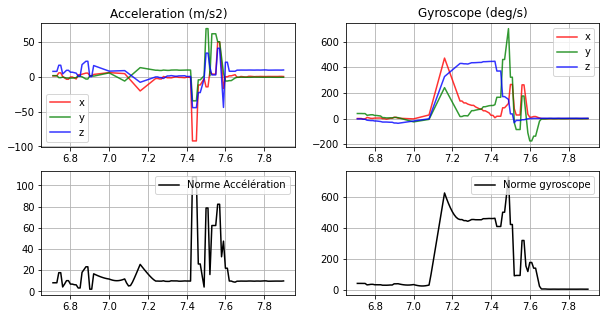

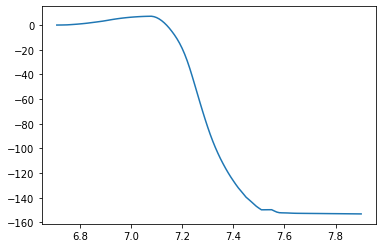

In [58]:
quaternion=Quaternion()
print(trick.gyroscope[:,100])
g_fixes=[]
q=[]
theta_list=[]
euler_list=[]
for i in range(trick.nb_row):
    quaternion.rotate(trick.gyroscope[:,i]*np.pi/180,trick.Te)
    rot =quaternion.get_rot_mat()
    q.append(rot.T)
    theta = np.arctan2(q[-1][1,0],q[-1][1,1])*180/np.pi
    euler=quaternion.get_euler_angles()
    euler_list.append(euler)
    
    theta_list.append(theta)

print(quaternion.q)
print(quaternion.get_rot_mat())

plt.figure(figsize=(10,5))
trick.dispRawData()
plt.show()
plt.plot(trick.time, theta_list)
plt.show()

# euler_list=np.array(euler_list)
# df.plotVector(trick.time, euler_list, "euler angle",111)
